<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>

En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets** 

Una de las actividades típicas en el departamento es el análisis, minería de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjuntará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraídos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisiéramos conocer cuál es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que está en los textos, cabe destacar que este notebook está diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un análisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por tópicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*

## Minería de Texto - Davivienda Tweets.

Con la finalidad de realizar el ejercicio de minería y procesamiento de lenguaje natural puede utilizar cualquier librería de Python que facilite las siguientes tareas:

1. ***Análisis exploratorio*** y descriptivo de la base de datos davivienda_tweets.csv

2. ***Pre pocesamiento del texto***:

    * Tokenizar: Separar el texto en párrafos, frases, etc..
    * Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres, etc. Utilice expresiones regulares para limpiar su texto.
    * Stopwords: estas palabras no tienen un significado por sí solas, sino que modifican o acompañan a otras.
    * Lematizar: cambio de tiempos verbales.
    * Estematizar o Stemmed: convertir palabras a sus raíces

3. ***WordClouds o Nubes de Palabras*** que permitan la visualización de datos  textuales significativos y conocer su relevancia en el texto.

4. ***Matriz termino-documento*** - Document-Term Matrix.

5. ***Histograma*** de palabras más importantes.

6. ***Latent Dirichlet Allocation*** - Modelo no supervisado de Tópicos.

7. ***Interpretación de Resultados y conclusiones generales.***


##**Propuesta de solución:**

Se procede a descargar la base de datos de Tweets

In [ ]:
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"

--2022-08-08 21:26:59--  https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 677050 (661K) [text/plain]
Saving to: ‘/content/davivienda_tweets.csv’

davivienda_tweets.c 100%[===================>] 661.18K  --.-KB/s    in 0.02s   

2022-08-08 21:27:00 (41.3 MB/s) - ‘/content/davivienda_tweets.csv’ saved [677050/677050]



2. Cargar librerías a utilizar.

In [ ]:
### Carga de librerías ###

# Para trabajar con archivos CSV 
import pandas as pd
import numpy as np

# Para importar métodos de extracción de características de sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Para importar clasificadores de sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import tree

# Para importar diferentes métricas para evaluar los clasificadores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
from sklearn.metrics import classification_report

# Para realizar la visualización del Word Cloud
import  matplotlib.pyplot as plt
from  wordcloud import WordCloud

# Para el clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Para importar la función de tiempo desde el módulo de tiempo para rastrear la duración del entrenamiento
from time import time

##1. Análisis Exploratorio:

Se carga la base de datos y se realiza un análisis descriptivo de la data.

In [ ]:
# Carga de base
tweets = pd.read_csv('davivienda_tweets.csv')
tweets.head(5)

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...
3,3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,NaN,2.0,1,2,[],https://twitter.com/fergomezr28/status/1466021...
4,4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,NaN,3.0,NaN,8,[],https://twitter.com/MirandaSuspLo/status/14661...


In [ ]:
tweets.describe()

,Unnamed: 0,Comments
count,1811.000000,838.000000
mean,905.000000,1.511933
std,522.934986,3.866250
min,0.000000,1.000000
25%,452.500000,1.000000
50%,905.000000,1.000000
75%,1357.500000,1.000000
max,1810.000000,87.000000


In [ ]:
tweets.columns

Index(['Unnamed: 0', 'UserScreenName', 'UserName', 'Timestamp', 'Text',
       'Embedded_text', 'Emojis', 'Comments', 'Likes', 'Retweets',
       'Image link', 'Tweet URL'],
      dtype='object')

De la exploración preliminar de la información se logró evidenciar la siguiente información:

1. La base de datos está conformada por 12 variables (en las que se encuentra el nombre del usuario, la fecha del tweet, el texto del tweet, si tiene o no emojis, la cantidad de likes, la cantidad de retweets, entre otros).
2. Hay 1.811 registros.
3. La variable objetivo en este ejercicio será la denominada **“Embedded_text”**.
4. Existen variables con información faltante como Likes, Emojis, Retweets y Image link.

## 2. Pre procesamiento de Texto

Se realiza una segmentación de la base de datos, para practicidad en la manipulación de la data y se seleccionan las siguientes variables:

In [ ]:
tweets_seg = tweets[['Unnamed: 0','Embedded_text']]
tweets_seg.head()

,Unnamed: 0,Embedded_text
0,0,La confianza se afectó. El indicador de confia...
1,1,Buscamos la accesibilidad y mejor atención en ...
2,2,Señores \n@Davivienda\n no he podido ingresar ...
3,3,Llevo toda una semana sufriendo intento de hur...
4,4,Hemos retrocedido tanto en este país con este ...


**Pre procesamiento**.

En esta sección del proyecto se procede a realizar la limpieza de la información, la cual consiste en quitar números, signos de puntuación, signos diacríticos, caracteres especiales y dejar todo el texto en minúscula. Tal como se presenta a continuación:

In [ ]:
# Se quitan los números del texto
import re
tweets_seg['Clean_Embedded_text'] = tweets_seg['Embedded_text'].apply(lambda x: re.sub(r'\d+','', x))


# Convertir todo en minúsculas
tweets_seg['Clean_Embedded_text'] = tweets_seg['Clean_Embedded_text'].str.lower()


# Se quitan los signos de puntuación
import string
tweets_seg['Clean_Embedded_text'] = tweets_seg['Clean_Embedded_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


# Se quitan los signos diacríticos
!pip install unidecode
import unidecode
tweets_seg['Clean_Embedded_text'] = tweets_seg['Clean_Embedded_text'].apply(lambda x: unidecode.unidecode(x))


# Se quitan los signos de puntuación nuevamente, para ajustar los signos de admiración e interrogación que abren.
import string
tweets_seg['Clean_Embedded_text'] = tweets_seg['Clean_Embedded_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
tweets_seg

# Se quitan los ultimos detalles como el caracter especial "\"
tweets_seg['Clean_Embedded_text'] = tweets_seg['Clean_Embedded_text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]"," ", x))
tweets_seg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 13.6 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Unnamed: 0,Embedded_text,Clean_Embedded_text
0,0,La confianza se afectó. El indicador de confia...,la confianza se afecto el indicador de confian...
1,1,Buscamos la accesibilidad y mejor atención en ...,buscamos la accesibilidad y mejor atencion en ...
2,2,Señores \n@Davivienda\n no he podido ingresar ...,senores davivienda no he podido ingresar a m...
3,3,Llevo toda una semana sufriendo intento de hur...,llevo toda una semana sufriendo intento de hur...
4,4,Hemos retrocedido tanto en este país con este ...,hemos retrocedido tanto en este pais con este ...
...,...,...,...
1806,1806,En respuesta a \n@JaimeMolina\nBuenas tardes. ...,en respuesta a jaimemolina buenas tardes sr j...
1807,1807,"En respuesta a \n@josefe71\nHola Jose , gracia...",en respuesta a josefe hola jose gracias por ...
1808,1808,En respuesta a \n@gleniiaaa\nHola! Bienvenida ...,en respuesta a gleniiaaa hola bienvenida a nu...
1809,1809,"En respuesta a \n@diegoruix\nBuenos días, Sr. ...",en respuesta a diegoruix buenos dias sr diego...


Posteriormente se quitan los stop words y se tokeniza el corpus para dejarlo listo para proceder con el procesamiento de lenguaje natural.

In [ ]:
# TOKENIZAR EL TEXTO Y QUITAR STOP WORDS

## Método NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  #descargar stopwords de todos los idiomas
nltk.download('punkt') # Complemento necesario para tokenizar un archivo como el que se está manejando
from nltk.tokenize import word_tokenize
stop_words_nltk = set(stopwords.words('spanish')) #selecciona stopword de solo español

tweets_seg['Clean_Embedded_text'] = tweets_seg['Clean_Embedded_text'].apply(lambda x: word_tokenize(x)) # Tokenizar textos
tweets_seg['Clean_Embedded_text'] = tweets_seg['Clean_Embedded_text'].apply(lambda x: [i for i in x if not i in stop_words_nltk]) # Elimino los stop words

# UNIR EL TEXTO PARA QUE QUEDE SEPARADO POR SOLO UN ESPACIO
tweets_seg['Clean_Embedded_text_FINAL'] = tweets_seg['Clean_Embedded_text'].apply(lambda x: ' '.join([token for token in x]))
tweets_seg

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] ==

,Unnamed: 0,Embedded_text,Clean_Embedded_text,Clean_Embedded_text_FINAL
0,0,La confianza se afectó. El indicador de confia...,"[confianza, afecto, indicador, confianza, davi...",confianza afecto indicador confianza daviviend...
1,1,Buscamos la accesibilidad y mejor atención en ...,"[buscamos, accesibilidad, mejor, atencion, tra...",buscamos accesibilidad mejor atencion tramites...
2,2,Señores \n@Davivienda\n no he podido ingresar ...,"[senores, davivienda, podido, ingresar, app, d...",senores davivienda podido ingresar app davivie...
3,3,Llevo toda una semana sufriendo intento de hur...,"[llevo, toda, semana, sufriendo, intento, hurt...",llevo toda semana sufriendo intento hurto medi...
4,4,Hemos retrocedido tanto en este país con este ...,"[retrocedido, pais, gobierno, malparidos, caje...",retrocedido pais gobierno malparidos cajeros d...
...,...,...,...,...
1806,1806,En respuesta a \n@JaimeMolina\nBuenas tardes. ...,"[respuesta, jaimemolina, buenas, tardes, sr, j...",respuesta jaimemolina buenas tardes sr jaime m...
1807,1807,"En respuesta a \n@josefe71\nHola Jose , gracia...","[respuesta, josefe, hola, jose, gracias, escri...",respuesta josefe hola jose gracias escribirnos...
1808,1808,En respuesta a \n@gleniiaaa\nHola! Bienvenida ...,"[respuesta, gleniiaaa, hola, bienvenida, canal...",respuesta gleniiaaa hola bienvenida canal aten...
1809,1809,"En respuesta a \n@diegoruix\nBuenos días, Sr. ...","[respuesta, diegoruix, buenos, dias, sr, diego...",respuesta diegoruix buenos dias sr diego evide...


## 3. Word Clouds o Nubes de Palabras

Se define la función "genera_WordCloud", la cual contiene los parámetros necesarios para realizar la visualización de las palabras y se encuentra debidamente documentada.

In [ ]:
def genera_WordCloud(data):
    'Esta función define la forma en la que se va a presentar gráficamente la nuve de palabras'
    wordcloud = WordCloud(background_color='white',     #Fondo color blanco
        stopwords=stop_words_nltk,                      #Stop words
        max_words=200,                                  #Máximo de palabras
        max_font_size=300,                              #Tamaño
        scale=3,                                        #Escala
        random_state=3).generate(str(data))             #Genera el word cloud

    wordcloud.recolor(random_state=1)
    plt.figure(figsize=(20, 15))                        #Tamaño de la gráfica
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Word Cloud para los tweets relacionados con Davivienda



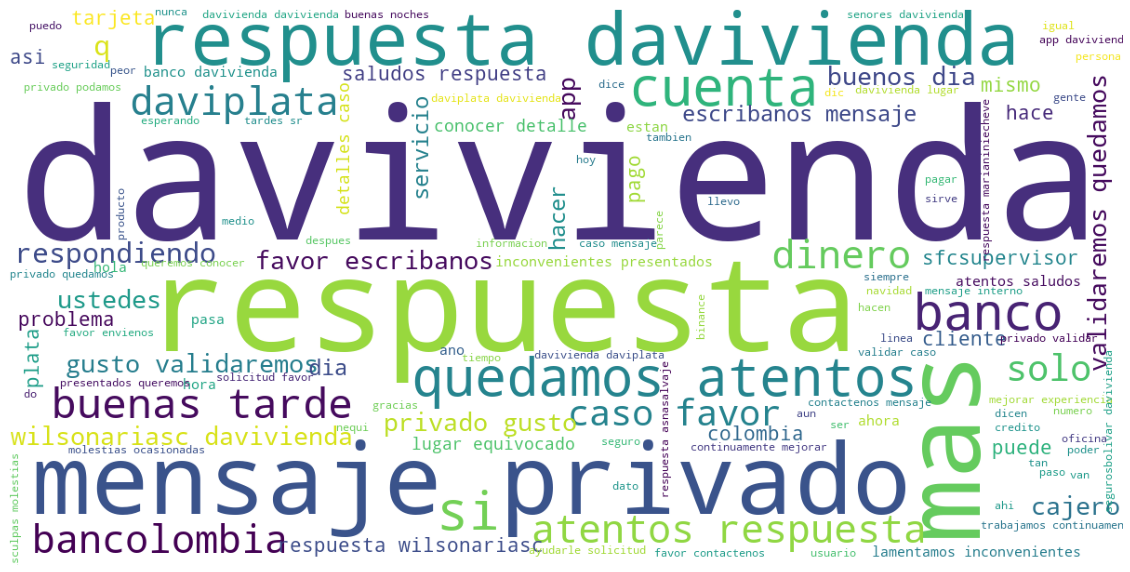

In [ ]:
#Presentación de la nube de palabras
Nube_palabras = tweets_seg['Clean_Embedded_text_FINAL'].str.cat(sep=' ').replace(' .','.')
Nube_palabras
print('Word Cloud para los tweets relacionados con Davivienda\n')
genera_WordCloud(Nube_palabras)

##4. Modelo computable DTM (Term Frequency)

Con este modelo se pretende presentar la relación de palabras más frecuentes encontradas en el corpus.

In [ ]:
# DTM
vector = CountVectorizer()
doc_vec = vector.fit_transform(tweets_seg['Clean_Embedded_text_FINAL'])
df2 = pd.DataFrame(doc_vec.toarray().transpose(),index=vector.get_feature_names())
df2['total_count'] = df2.sum(axis=1)    #Crea columna total_count y corresponde al total de veces que aparece la palabra
df2 = df2.sort_values(by ='total_count',ascending=False) #Organiza de mayor a menor
df2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,1802,1803,1804,1805,1806,1807,1808,1809,1810,total_count
davivienda,1,1,2,2,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1660
respuesta,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1066
mas,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,339
mensaje,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,288
privado,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,1,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
crimilanes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
creyendo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
creido,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
llegara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Histograma de las palabras más relevantes evidenciadas en el corpus.

Text(0.5, 1.0, 'Histograma de las 30 palabras más relevantes\n encontradas en los Tweets')

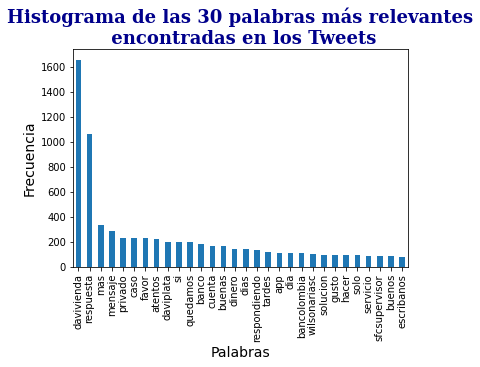

In [ ]:
df3 = df2['total_count'].iloc[0:30]    #Selecciona los primeros 30 registros de la variable
df3
df3.plot.bar()

plt.xlabel("Palabras", size = 14,)      #Nombre al eje X
plt.ylabel("Frecuencia", size = 14)     #Nombre al eje Y

plt.title("Histograma de las 30 palabras más relevantes\n encontradas en los Tweets", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18}) #Título de gráfica con sus características

##5. Modelo no supervisado de tópicos:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary

dictionary = Dictionary(tweets_seg['Clean_Embedded_text'].to_list())    # Identificadores a cada palabra
dictionary.compactify()     
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)  #Filtra las palabras que aparecen en menos de 2 documentos, las que aparecen en más del 97% del corpus, y conserve todas las demás palabras
dictionary.compactify()         #Identificadores a cada palabra después de filtrar
corpus = [dictionary.doc2bow(text) for text in tweets_seg['Clean_Embedded_text']]  #Para cada revisión, cree una representación B.O.W. 

In [ ]:
# Cantida optima de tópicos de acuerdo a la coherencia 
from gensim.models import LdaModel
from gensim.models import CoherenceModel
texts = tweets_seg['Clean_Embedded_text'].to_list()         #Texto a utilizar
MAX_TOPICS = 8                                             #Número máximo de topicos
coherence_vals = []                                         #Lista de coherencia vacía
lm_list = []

for n_topics in range(1, MAX_TOPICS+1):
    lm = LdaModel(corpus=corpus, num_topics = n_topics,     #Modelo LDA con sus parámetros
          id2word=dictionary)
    lm_list.append(lm)                                      #Agrega lm a la lista vacía definida antes
    
    cm = CoherenceModel(model=lm, texts=texts,              #Modelo de coherencia con sus parámetros
         dictionary=dictionary, coherence='c_v')
    
    coherence_vals.append(cm.get_coherence())               #Agrega cm a la lista vacía definida antes

In [ ]:
#Valores de coherencia
coherence_vals

[0.1625065305605681,
 0.19172958828253533,
 0.14005962915504608,
 0.3427165774013927,
 0.32508525614312556,
 0.33014260544410806,
 0.281037504094586,
 0.33283724917838625]

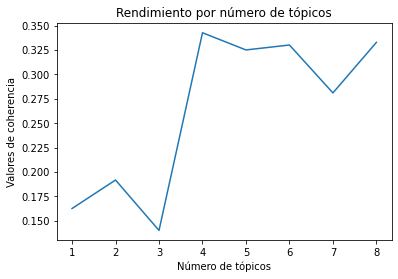

In [ ]:
#Gráfica para determinar la cantidad de tópicos más adecuada
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_TOPICS+1), coherence_vals)        #Grafica los valores de coherencia presentados anteriormente
plt.title('Rendimiento por número de tópicos')
plt.xlabel('Número de tópicos')
plt.ylabel('Valores de coherencia')
plt.show()  # Gráfico de coherencia y donde está el pico mas alto esa es la cantidad de tópicos a utilizar

De acuerdo al gráfico se puede observar que la cantidad adecuada de tópicos es de 4, los cuales se presentan a continuación:

In [ ]:
#Presentación de los tópicos
model_6topics = lm_list[3]   # Selecciona los 4 primeros tópicos
model_6topics.print_topics()

[(0,
  '0.058*"davivienda" + 0.033*"respuesta" + 0.015*"mas" + 0.009*"q" + 0.007*"si" + 0.007*"daviplata" + 0.007*"dinero" + 0.006*"respondiendo" + 0.006*"app" + 0.006*"servicio"'),
 (1,
  '0.062*"davivienda" + 0.049*"respuesta" + 0.020*"mensaje" + 0.018*"privado" + 0.017*"atentos" + 0.015*"quedamos" + 0.015*"caso" + 0.014*"favor" + 0.010*"buenas" + 0.008*"daviplata"'),
 (2,
  '0.054*"davivienda" + 0.023*"mas" + 0.022*"respuesta" + 0.010*"respondiendo" + 0.008*"banco" + 0.007*"si" + 0.006*"cuenta" + 0.006*"dinero" + 0.005*"sfcsupervisor" + 0.005*"plata"'),
 (3,
  '0.068*"davivienda" + 0.041*"respuesta" + 0.015*"si" + 0.014*"mas" + 0.010*"banco" + 0.009*"wilsonariasc" + 0.008*"equivocado" + 0.008*"lugar" + 0.007*"daviplata" + 0.007*"bancolombia"')]

Del resultado presentado se puede decir que los tópicos están relacionados de la siguiente manera:




Tópico 1: Mensajes relacionados con usuarios que requieren respuesta sobre la aplicación daviplata.

Tópico 2: Mensajes privados enviados a la entidad por parte de los usuarios.

Tópico 3: Mensajes relacionados con situaciones presentadas en cuentas bancarias.

Tópico 4: Mensajes relacionados con usuarios que solicitan respuestas sobre otros productos o servicios del banco.

## **Conclusiones:**

1. Los resultados presentados son de gran interés para el departamento de servicio al cliente, toda vez que evidencian una serie requerimientos realizados por los usuarios del banco que esperan pronta respuesta.

2. De acuerdo con el modelo no supervisado de tópicos se pudo determinar un total de 4 temáticas generales presentadas en los mensajes recolectados de Twitter; los cuales son app Daviplata, imbox a la entidad, cuentas bancarias y otros productos/servicios.

3. Las palabras más frecuentes del corpus fueron Davivienda, Respuesta, Mensaje, Privado, Quedamos, atentos; las cuales contextualizan un escenario de requerimientos hechos por usuarios de la entidad.

4. El análisis exploratorio permitió determinar que la data está conformada por 12 variables, 1.811 registros y que la variable objetivo era “Embedded_text”.

5. Para obtener resultados óptimos en el procesamiento de lenguaje natural, es necesario realizar una adecuada limpieza a la información y preparar la data para su análisis.